In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sqlalchemy import create_engine, inspect

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Create a connection to the database
database_path = "Resources/hawaii.sqlite"
connection_str = f"sqlite:///{database_path}"
print(connection_str)

engine = create_engine(connection_str)

sqlite:///Resources/hawaii.sqlite


In [4]:
# Create the inspector and connect to the engine # create engine to hawaii.sqlite
inspector_gadget = inspect(engine)

tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column)
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [5]:
# reflect an existing database into a new model # reflect the tables
query = "SELECT * from measurement LIMIT 20;"
measure_df= pd.read_sql(query, engine)
measure_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [6]:
query = "SELECT * from station LIMIT 20;"
station_df= pd.read_sql(query, engine)
station_df.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [7]:
# Find the most recent date in the data set.
query = """ SELECT
                MAX(date)
            FROM
                measurement
"""

engine.execute(query).fetchall()

[('2017-08-23',)]

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [9]:
query = """ SELECT
                date,
                prcp
            FROM
                measurement
            WHERE
                date >= '2016-08-23'
                and prcp is not null
            ORDER BY
                date asc;
"""

precip_df = pd.read_sql(query,engine)
precip_df.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79
5,2016-08-23,0.70
6,2016-08-24,0.08
7,2016-08-24,2.15
8,2016-08-24,2.28
9,2016-08-24,1.22


In [10]:
precip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2021 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.7+ KB


In [11]:
precip_df["date"] = pd.to_datetime(precip_df["date"])
precip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2021 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.7 KB


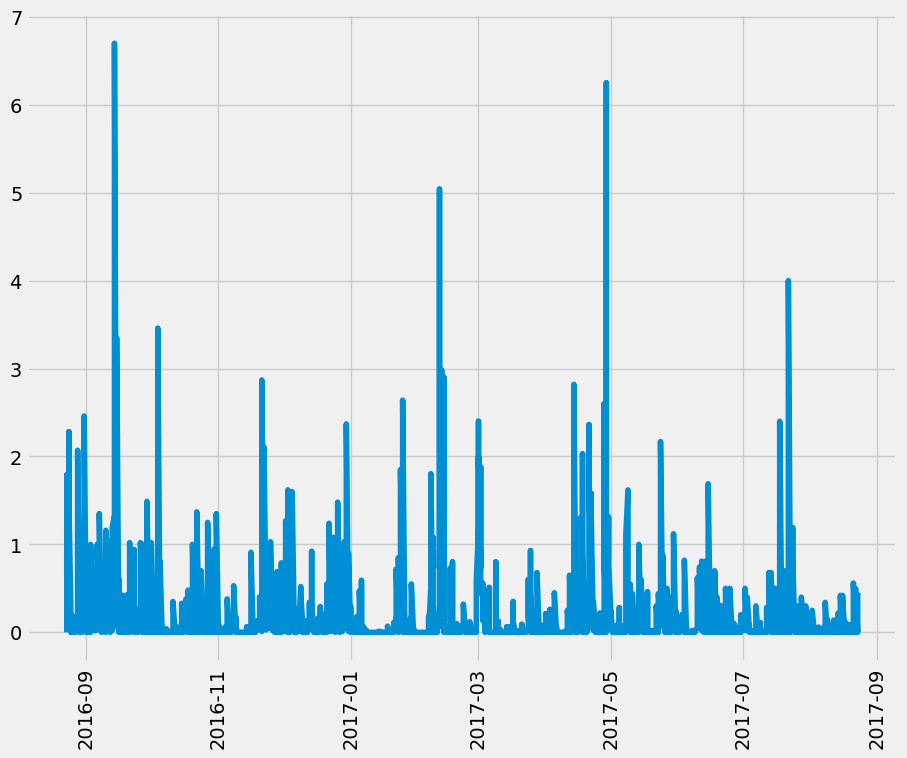

In [12]:
plt.figure(figsize=(10,8))
plt.plot(precip_df["date"], precip_df.prcp)
plt.xticks(rotation=90)
plt.show()

In [13]:
query = """ SELECT
                date,
                avg(prcp) as prcp
            FROM
                measurement
            WHERE
                date >= '2016-08-23'
                and prcp is not null
            GROUP BY
                date
            ORDER BY
                date asc;
"""

df2 = pd.read_sql(query,engine)
df2["date"] = pd.to_datetime(df2["date"])
df2.head(10)

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000
5,2016-08-28,0.516667
6,2016-08-29,0.243333
7,2016-08-30,0.011667
8,2016-08-31,0.636000
9,2016-09-01,0.006000


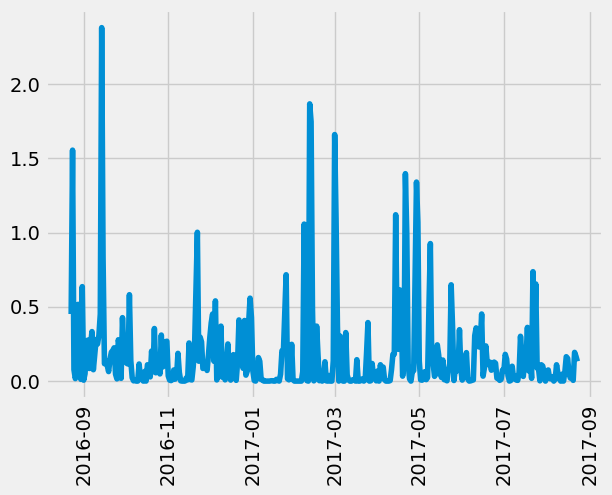

In [14]:
# plt.figure(figsize=(10,8))
plt.plot(df2["date"], df2.prcp)
plt.xticks(rotation=90)
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [17]:
#STATIONS
query = "SELECT COUNT(*) FROM station"
engine.execute(query).fetchall()

[(9,)]

In [18]:
#list stations and observations

query = """ SELECT
                s.station,
                count(m.id) as num_obs
            FROM
                measurement m 
            JOIN station s on m.station = s.station
            GROUP BY
                s.station
            ORDER BY
                num_obs desc;
"""

station_df = pd.read_sql(query,engine)
station_df

,station,num_obs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [19]:
query = """
        SELECT
            min(tobs) as min_tobs,
            max(tobs) as max_tobs,
            avg(tobs) as avg_tobs
        FROM
            measurement
        WHERE
            station = 'USC00519281';
"""


station_df2 = pd.read_sql(query, engine)
station_df2

,min_tobs,max_tobs,avg_tobs
0,54.0,85.0,71.663781


In [20]:
query = """
        SELECT
           tobs
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
            and station = 'USC00519281';
"""


temp_df = pd.read_sql(query, engine)
temp_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


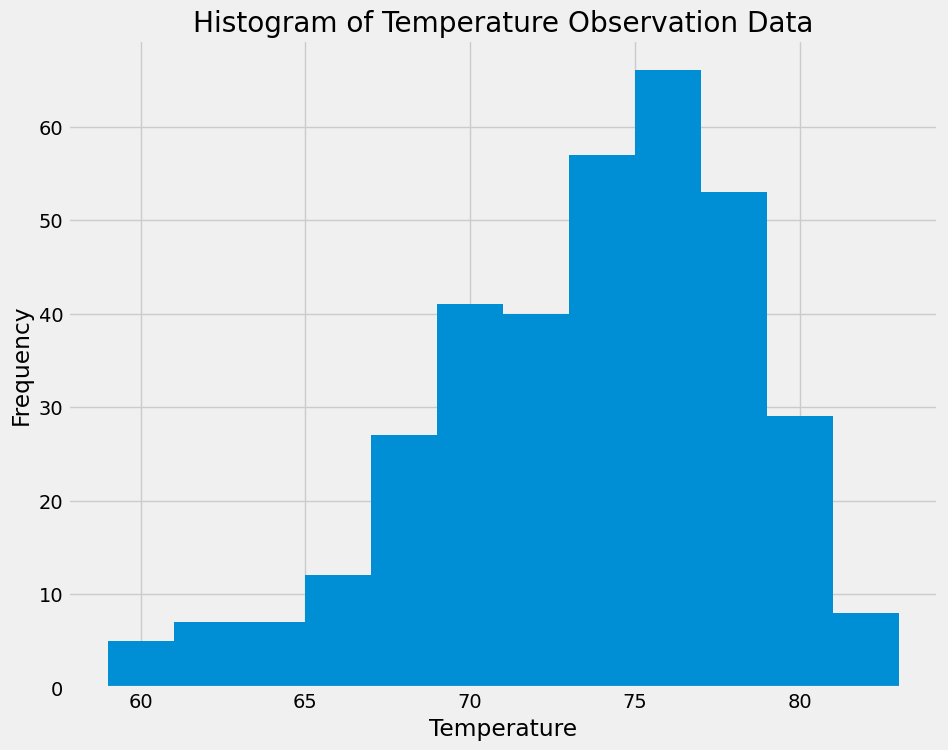

In [21]:
plt.figure(figsize=(10,8))
plt.hist(temp_df, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Histogram of Temperature Observation Data")
plt.show()